# Importing Data

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

,TIME,CH1
0,-32.00000,-16.0
1,-31.99997,-16.2
2,-31.99994,-16.3
3,-31.99990,-16.5
4,-31.99987,-16.7
...,...,...
1999995,31.99984,-15.6
1999996,31.99987,-15.7
1999997,31.99990,-15.6
1999998,31.99994,-15.6


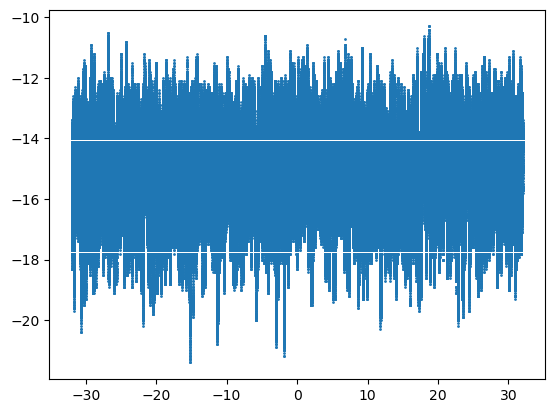

In [148]:
data = pd.read_csv('Data/Trapped Particle 01 - 2M pts.CSV', skiprows=15)
display(data)

plt.plot(data['TIME'], data['CH1'], 'o', markersize=1)
plt.show()

# Calculating FFT and PSD

In [149]:
voltages = data['CH1'] # Extract the signal
voltages = voltages - voltages.mean() # De-mean the signal

dt = data['TIME'].iloc[1] - data['TIME'].iloc[0] # Get the time step between points
total_timesteps = len(voltages) # Get the total number of time steps

# Compute PSD using scipy.signal.welch for better performance
welch = signal.welch(voltages, fs=1/dt, nperseg=3e5, scaling='density')
freqs = welch[0]
psd = welch[1]

psds = pd.DataFrame({'Frequency': freqs, 'PSD': psd})
display(psds)

,Frequency,PSD
0,0.000000,4.641004e-02
1,0.111111,1.841125e-01
2,0.222222,2.090435e-01
3,0.333333,1.804975e-01
4,0.444444,1.463245e-01
...,...,...
149996,16666.222223,1.441033e-07
149997,16666.333334,2.070353e-07
149998,16666.444445,1.473677e-07
149999,16666.555556,1.264632e-07


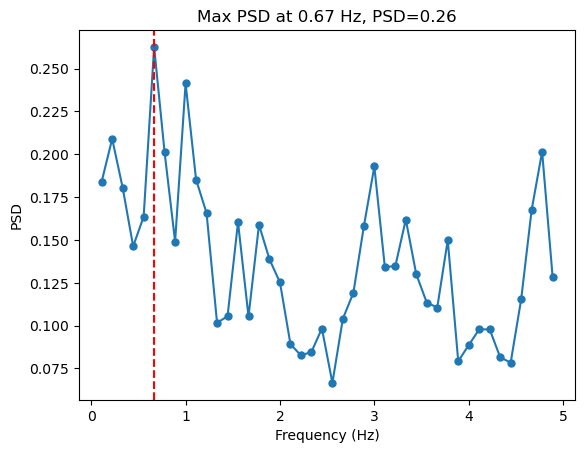

In [150]:
# We only graph low frequencies, since higher ones are noise
mask = psds['Frequency'] > 0 # Ignore the zero frequency
mask &= psds['Frequency'] < 5
# plt.plot(psds['Frequency'][mask], psds['PSD'][mask])
# We use a scatter plot with a connecting line
plt.plot(psds['Frequency'][mask], psds['PSD'][mask], 'o-', markersize=5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')

# Find the frequency with the highest PSD
max_psd_idx = np.argmax(psds['PSD'][mask])
max_psd_freq = psds['Frequency'][mask].iloc[max_psd_idx]
max_psd = psds['PSD'][mask].iloc[max_psd_idx]
plt.axvline(max_psd_freq, color='red', linestyle='--')
plt.title(f'Max PSD at {max_psd_freq:.2f} Hz, PSD={max_psd:.2f}')
plt.show()

# Convert resonant frequency to corresponding spring constant

In [151]:
# Find the frequency with the highest PSD
resonant_freq = psds['Frequency'][mask].iloc[max_psd_idx]

# Recall f = 1 / (2 * pi) * sqrt(k / m)
# We can rearrange this to k = (2 * pi * f) ** 2 * m
# TODO INPUT THE SPHERE RADIUS AND DENSITY
r = 0.5e-6 # Sphere radius in meters
rho = 1050 # Sphere density in kg/m^3
m = 4/3 * np.pi * r ** 3 * rho
k = (2 * np.pi * resonant_freq) ** 2 * m

print(f'Resonant frequency: {resonant_freq:.2f} Hz')
print(f'Spring constant: {k:.2f} N/m')

Resonant frequency: 0.67 Hz
Spring constant: 0.00 N/m
